# Raffi Argianda
# 221351112
# Malam B

In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("3.performa_pegawai.csv")

In [3]:

df.head()

,ID,Kinerja_Kerja,Absensi,Kepuasan_Kerja,Kemampuan_Komunikasi,Kemampuan_Teknis,Keterlibatan
0,1,98,14,7,5,8,3
1,2,88,8,9,3,6,5
2,3,74,9,9,9,7,10
3,4,67,6,5,8,7,4
4,5,80,11,10,5,3,8


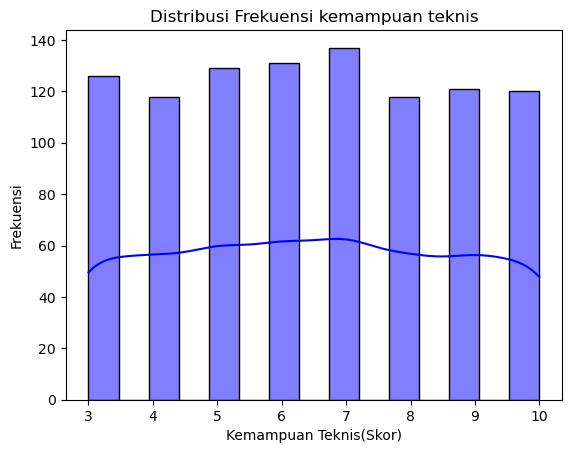

In [4]:
sns.histplot(df['Kemampuan_Teknis'],
             kde=True,
             color='blue',
             bins=15)
plt.title("Distribusi Frekuensi kemampuan teknis")
plt.xlabel("Kemampuan Teknis(Skor)")
plt.ylabel("Frekuensi")
plt.show()

In [5]:
protocol_counts = df['Kemampuan_Teknis'].value_counts()
protocol_counts

Kemampuan_Teknis
7     137
6     131
5     129
3     126
9     121
10    120
8     118
4     118
Name: count, dtype: int64

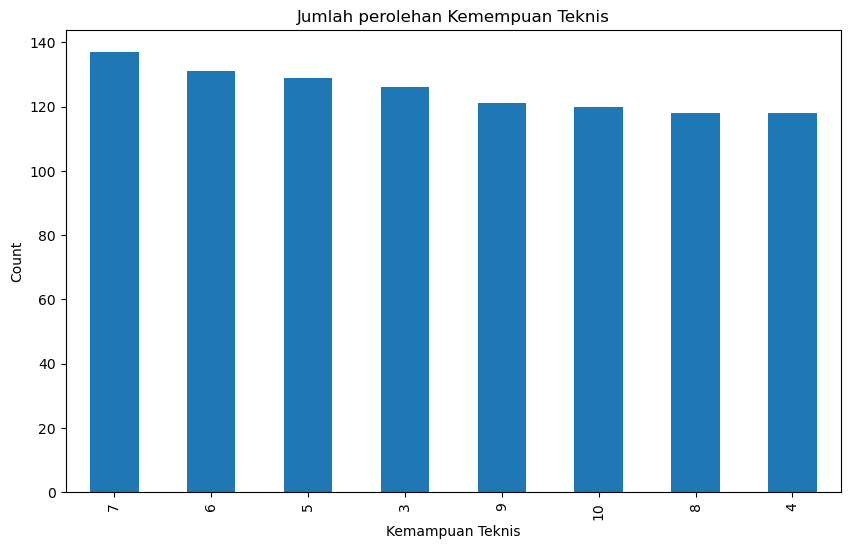

In [6]:
plt.figure(figsize=(10,6))
protocol_counts.plot(kind='bar')
plt.title('Jumlah perolehan Kemempuan Teknis')
plt.xlabel('Kemampuan Teknis')
plt.ylabel('Count')
plt.show()

In [7]:
features = ['Kemampuan_Komunikasi','Kemampuan_Teknis','Keterlibatan']
x = df[features]
df.drop(columns=['Kinerja_Kerja', 'Absensi', 'Kepuasan_Kerja'])
df.head()

,ID,Kinerja_Kerja,Absensi,Kepuasan_Kerja,Kemampuan_Komunikasi,Kemampuan_Teknis,Keterlibatan
0,1,98,14,7,5,8,3
1,2,88,8,9,3,6,5
2,3,74,9,9,9,7,10
3,4,67,6,5,8,7,4
4,5,80,11,10,5,3,8


In [8]:
linked = linkage(x, method='ward')

In [9]:
df.head()

,ID,Kinerja_Kerja,Absensi,Kepuasan_Kerja,Kemampuan_Komunikasi,Kemampuan_Teknis,Keterlibatan
0,1,98,14,7,5,8,3
1,2,88,8,9,3,6,5
2,3,74,9,9,9,7,10
3,4,67,6,5,8,7,4
4,5,80,11,10,5,3,8


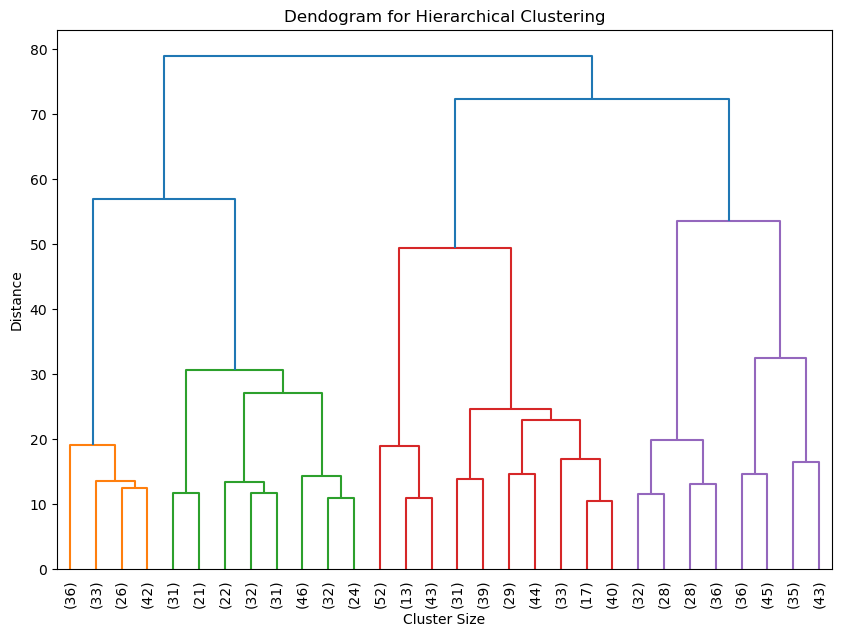

In [10]:
plt.figure(figsize=(10,7))
plt.title("Dendogram for Hierarchical Clustering")
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [11]:
df.head()

,ID,Kinerja_Kerja,Absensi,Kepuasan_Kerja,Kemampuan_Komunikasi,Kemampuan_Teknis,Keterlibatan
0,1,98,14,7,5,8,3
1,2,88,8,9,3,6,5
2,3,74,9,9,9,7,10
3,4,67,6,5,8,7,4
4,5,80,11,10,5,3,8


In [12]:
features = ['Kinerja_Kerja','Absensi', 'Kepuasan_Kerja', 'Kemampuan_Komunikasi', 'Kemampuan_Teknis', 'Keterlibatan']
x = df[features]

In [13]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [14]:
linked = linkage(x_scaled, method='ward')

In [15]:
cluster_labels = cut_tree(linked, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0,
       0, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0,
       1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0,
       0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2,
       2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 0,

In [16]:
df['HC'] = cluster_labels
df.head()

,ID,Kinerja_Kerja,Absensi,Kepuasan_Kerja,Kemampuan_Komunikasi,Kemampuan_Teknis,Keterlibatan,HC
0,1,98,14,7,5,8,3,0
1,2,88,8,9,3,6,5,0
2,3,74,9,9,9,7,10,1
3,4,67,6,5,8,7,4,2
4,5,80,11,10,5,3,8,0


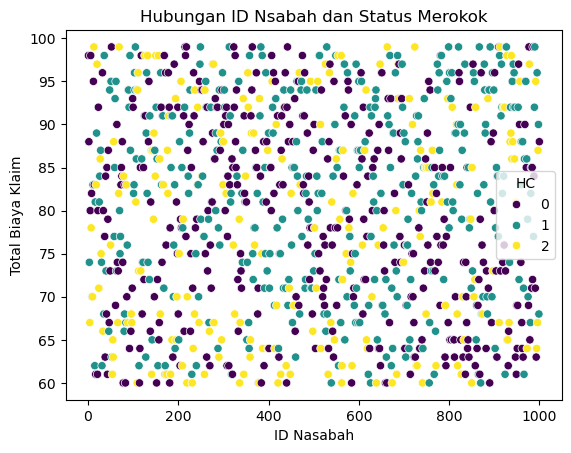

In [17]:
plt.figure()
sns.scatterplot(data=df,
                x='ID',
                y='Kinerja_Kerja',
                hue='HC',
                palette='viridis')
plt.title("Hubungan ID Nsabah dan Status Merokok")
plt.xlabel("ID Nasabah")
plt.ylabel("Total Biaya Klaim")
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   ID                    1000 non-null   int64
 1   Kinerja_Kerja         1000 non-null   int64
 2   Absensi               1000 non-null   int64
 3   Kepuasan_Kerja        1000 non-null   int64
 4   Kemampuan_Komunikasi  1000 non-null   int64
 5   Kemampuan_Teknis      1000 non-null   int64
 6   Keterlibatan          1000 non-null   int64
 7   HC                    1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB
